# GMU ECE 527 - Computer Exercise #2 - Code
**Stewart Schuler - G01395779**\
**20240912**

Global imports and define PLA functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron_sgd(X, y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 20
    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*y[i]) <= 0:
                w = w + eta*X[i]*y[i]
    return w
                
def perceptron_sgd_pocket(X, y):
    w = np.zeros(len(X[0]))
    w_pocket = w
    pocket_score = 0
    eta = 1
    epochs = 20
    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*y[i]) <= 0:
                w = w + eta*X[i]*y[i]
                tmp_score = perceptron_eval(X,y,w)
                if(  tmp_score > pocket_score ):
                    pocket_score = tmp_score
                    w_pocket = w
    return w_pocket
                
def perceptron_eval(X,y,w):
    num_correct = 0
    for ii in range(X.shape[0]):
        if (np.dot(X[ii],w)*y[ii]) > 0:
            num_correct+=1
    return num_correct/X.shape[0]
    

Generate separable test dataset

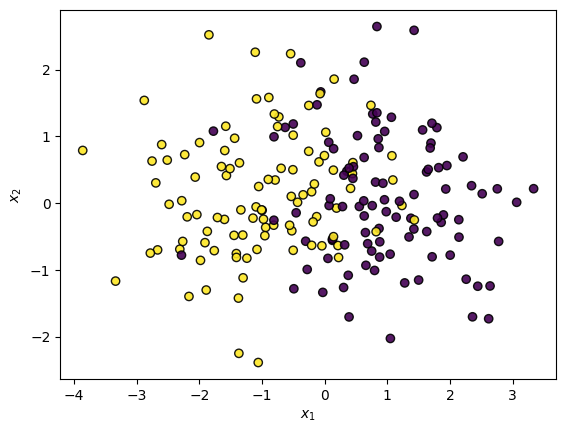

In [2]:
# Set random seed
np.random.seed(5)

# Generate Two class gausian data
N = int(200)
X = np.zeros((N,2))
X[0:int(N/2):1, 0:2:1] = np.random.normal([-1,0], [1,1], (int(N/2),2)) #X Class -1
X[int(N/2):N:1, 0:2:1] = np.random.normal([1,0], [1,1], (int(N/2),2)) #X Class 1
y = np.zeros((N,1))
y[0:int(N/2):1,:] = 1
y[int(N/2):N:1,:] = -1

# Randomize data order
rand_perm = np.random.permutation(N)
X = X[rand_perm]
y = y[rand_perm]

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, edgecolors='black')


Run SGD and Pocket and Plot result boundary

Text(0, 0.5, '$x_2$')

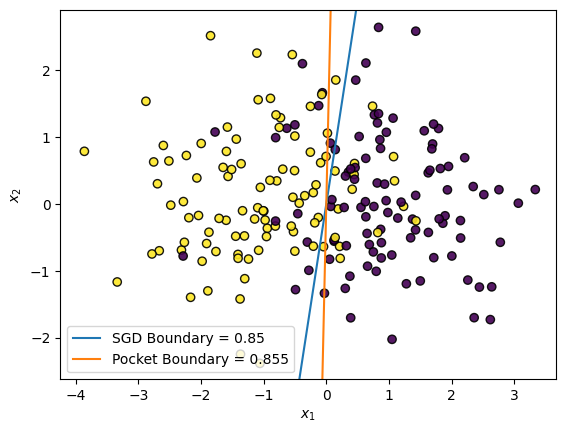

In [3]:
w = perceptron_sgd(X, y)
slope = -(w[0])/(w[1])

x_min = min(X[:,0])
x_max = max(X[:,0])

w_pocket = perceptron_sgd_pocket(X, y)
slope_pocket = -(w_pocket[0])/(w_pocket[1])

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.9, edgecolors='black')
plt.plot( [x_min, x_max], [slope*x_min,slope*x_max], label=f"SGD Boundary = {perceptron_eval(X,y,w)}")
plt.plot( [x_min, x_max], [slope_pocket*x_min,slope_pocket*x_max], label=f"Pocket Boundary = {perceptron_eval(X,y,w_pocket)}")
plt.legend()
plt.xlim([x_min*1.1,x_max*1.1])
plt.ylim([min(X[:,1])*1.1,max(X[:,1])*1.1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')


Run SGD and Pocket and Plot result boundary for a data set with an offset

Text(0, 0.5, '$x_2$')

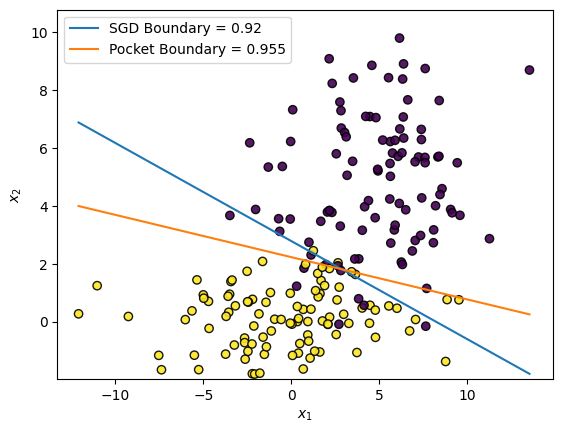

In [5]:
# Generate Two class gausian data
N = int(200)
X = np.zeros((N,3))
X[0:N:1, 0] = 1
X[0:int(N/2):1, 1:3:1] = np.random.normal([0,0], [4,1], (int(N/2),2)) #X Class -1
X[int(N/2):N:1, 1:3:1] = np.random.normal([5,5], [3,2], (int(N/2),2)) #X Class 1
y = np.zeros((N,1))
y[0:int(N/2):1,:] = 1
y[int(N/2):N:1,:] = -1

# Randomize data order
rand_perm = np.random.permutation(N)
X = X[rand_perm]
y = y[rand_perm]

w = perceptron_sgd(X, y)
slope = -(w[1])/(w[2])
inter = -w[0]/w[2]

w_pocket = perceptron_sgd_pocket(X, y)
slope_pocket = -(w_pocket[1])/(w_pocket[2])
inter_pocket = -w_pocket[0]/w_pocket[2]

x_min = min(X[:,1])
x_max = max(X[:,1])

plt.scatter(X[:, 1], X[:, 2], c=y, alpha=0.9, edgecolors='black')
plt.plot( [x_min, x_max], inter + [slope*x_min,slope*x_max], label=f"SGD Boundary = {perceptron_eval(X,y,w)}")
plt.plot( [x_min, x_max], inter_pocket + [slope_pocket*x_min,slope_pocket*x_max], label=f"Pocket Boundary = {perceptron_eval(X,y,w_pocket)}")
plt.legend()
plt.xlim([x_min*1.1,x_max*1.1])
plt.ylim([min(X[:,2])*1.1,max(X[:,2])*1.1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
